A manufacturing company has been experiancing a shift in the market place towards digital possibly leading a decline in its store sale (Resellers).

1. Shift in the market place towards digital - Is this true? Can we prove it with the data?

    A. We upload the data (Marketplacedata.csv)- the file contains both the online and store sales data.
    
    B. We will compare sales (revenue, profit, volume of transactions and items sold(order quantities) over time) 

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
# read the data
data = pd.read_csv('Marketplacedata.csv')
data.head()

,SalesOrderID,SalesOrderDetailID,Cost,UnitPrice,Revenue,Profit,Status,OnlineOrderFlag,OrderDate
0,43659,1,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31 00:00:00.000
1,43659,2,5694.2832,2024.994,6074.982,380.6988,5,Reseller,2011-05-31 00:00:00.000
2,43659,3,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31 00:00:00.000
3,43659,4,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31 00:00:00.000
4,43659,5,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31 00:00:00.000


In [19]:
# check the shape of the data
data.shape

(121317, 9)

In [20]:
#
data.describe()

,SalesOrderID,SalesOrderDetailID,Cost,UnitPrice,Revenue,Profit,Status
count,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.0
mean,57827.363782,60659.000000,828.197843,465.093496,905.449207,77.251363,5.0
std,9009.147902,35021.345641,1705.596529,751.885081,1693.417389,404.866112,0.0
min,43659.000000,1.000000,0.856500,1.328200,1.374000,-15099.745500,5.0
25%,49884.000000,30330.000000,10.842300,21.490000,24.990000,1.204600,5.0
50%,57029.000000,60659.000000,104.705200,49.990000,134.982000,13.452700,5.0
75%,65490.000000,90988.000000,1030.948800,602.346000,1120.490000,43.813700,5.0
max,75123.000000,121317.000000,38530.385400,3578.270000,27893.619000,1487.835600,5.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SalesOrderID        121317 non-null  int64  
 1   SalesOrderDetailID  121317 non-null  int64  
 2   Cost                121317 non-null  float64
 3   UnitPrice           121317 non-null  float64
 4   Revenue             121317 non-null  float64
 5   Profit              121317 non-null  float64
 6   Status              121317 non-null  int64  
 7   OnlineOrderFlag     121317 non-null  object 
 8   OrderDate           121317 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 8.3+ MB


In [22]:
# Let's rename the columns for better understanding
data = data.rename(columns={'OnlineOrderFlag':'Channels'})

In [23]:
data.head()

,SalesOrderID,SalesOrderDetailID,Cost,UnitPrice,Revenue,Profit,Status,Channels,OrderDate
0,43659,1,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31 00:00:00.000
1,43659,2,5694.2832,2024.994,6074.982,380.6988,5,Reseller,2011-05-31 00:00:00.000
2,43659,3,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31 00:00:00.000
3,43659,4,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31 00:00:00.000
4,43659,5,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31 00:00:00.000


In [25]:
# Let's extract only the date part from the OrderDate column
data['OrderDate'] = pd.to_datetime(data['OrderDate']).dt.date

In [26]:
data.head()

,SalesOrderID,SalesOrderDetailID,Cost,UnitPrice,Revenue,Profit,Status,Channels,OrderDate
0,43659,1,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31
1,43659,2,5694.2832,2024.994,6074.982,380.6988,5,Reseller,2011-05-31
2,43659,3,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31
3,43659,4,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31
4,43659,5,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31


In [24]:
# check for the count of each market segment
data['Channels'].value_counts()

Channels
Reseller    60919
Online      60398
Name: count, dtype: int64

<Axes: xlabel='OnlineOrderFlag'>

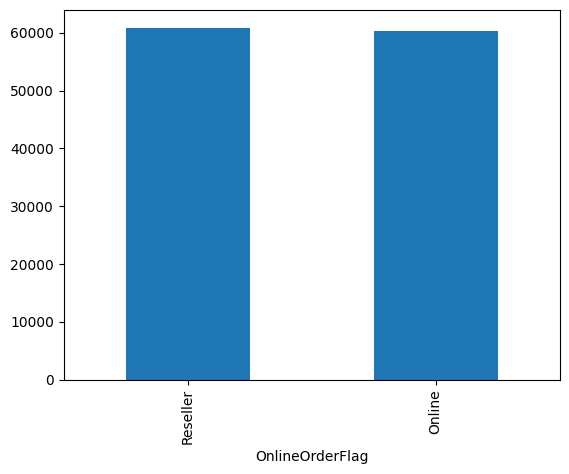

In [7]:
data['OnlineOrderFlag'].value_counts().plot(kind='bar')

<Axes: xlabel='OnlineOrderFlag'>

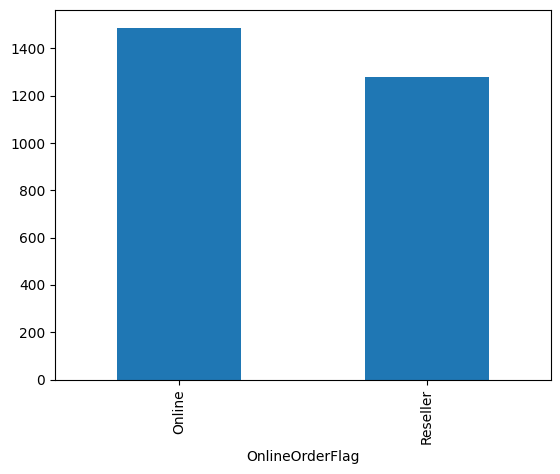

In [8]:
data['Profit'].groupby(data['OnlineOrderFlag']).max().plot(kind='bar')


In [11]:
data['TotalProfit'] = data['Profit'].groupby(data['OnlineOrderFlag']).transform('sum')

In [12]:
data.head()

,SalesOrderID,SalesOrderDetailID,Cost,UnitPrice,Revenue,Profit,Status,OnlineOrderFlag,OrderDate,TotalProfit
0,43659,1,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31 00:00:00.000,-2.316039e+06
1,43659,2,5694.2832,2024.994,6074.982,380.6988,5,Reseller,2011-05-31 00:00:00.000,-2.316039e+06
2,43659,3,1898.0944,2024.994,2024.994,126.8996,5,Reseller,2011-05-31 00:00:00.000,-2.316039e+06
3,43659,4,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31 00:00:00.000,-2.316039e+06
4,43659,5,1912.1544,2039.994,2039.994,127.8396,5,Reseller,2011-05-31 00:00:00.000,-2.316039e+06


In [14]:
data['Profit'].groupby(data['OnlineOrderFlag']).sum()

OnlineOrderFlag
Online      1.168794e+07
Reseller   -2.316039e+06
Name: Profit, dtype: float64